In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kshort_pn_4GeV_Jun2_ntuple/*.root")

In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

In [4]:
hists = {}
hists["rec_mass_hist"] = hist.Hist("Target SP Kaons",
                                hist.Bin("m", r"Reconstructed Mass [MeV]", 100, 0, 1000),
                            )   

In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    target_kaon_dau1 = ldmx_events['TSP_Kaon_dau1']
    target_kaon_dau2 = ldmx_events['TSP_Kaon_dau2']
    target_kaon_dau3 = ldmx_events['TSP_Kaon_dau3']
    target_kaon_dau4 = ldmx_events['TSP_Kaon_dau4']
    
    kshort_pdgid = 310
    chargedpion_pdgid = 211
    
    # first select only events w 2 daughters
    mask_2dau = (target_kaon_dau1.gd==0)
    
    mask_4dau1 = (target_kaon_dau1.gd==1)
    mask_4dau2 = (target_kaon_dau2.gd==1)
    mask_4dau3 = (target_kaon_dau3.gd==1)
    mask_4dau4 = (target_kaon_dau4.gd==1)
        
    pidau1_mask = (abs(target_kaon_dau1.pdgID)==22)
    pidau2_mask = (abs(target_kaon_dau2.pdgID)==22)
    pidau3_mask = (abs(target_kaon_dau3.pdgID)==22)
    pidau4_mask = (abs(target_kaon_dau4.pdgID)==22)
    
    kshort_mask = (abs(target_kaon_dau3.mompdgID)==kshort_pdgid)
        
    pidau1 = get_vector(target_kaon_dau1[pidau3_mask & kshort_mask & mask_4dau3])
    pidau2 = get_vector(target_kaon_dau2[pidau3_mask & kshort_mask & mask_4dau3])
    pidau3 = get_vector(target_kaon_dau3[pidau3_mask & kshort_mask & mask_4dau3])
    pidau4 = get_vector(target_kaon_dau4[pidau3_mask & kshort_mask & mask_4dau3])

    #print(flat(target_kaon_dau1.px).shape,flat(target_kaon_dau1[pidau3_mask].px).shape, flat(target_kaon_dau1[pidau3_mask & kshort_mask].px).shape, flat(target_kaon_dau1[pidau3_mask & kshort_mask & mask_4dau3].px).shape)
    
    print(flat(pidau1.mass).shape)
    print(flat(pidau2.mass).shape)
    print(flat(pidau3.mass).shape)
    print(flat(pidau4.mass).shape)
    
    pisum = (pidau1 + pidau2 + pidau3 + pidau4)
        
    print(flat(pisum.mass).shape)
    print(flat(pisum.mass))
    
    hists["rec_mass_hist"].fill(      
                                 m=flat(pisum.mass),      
                                )
    
    return

In [6]:
nchunk = 0
for chunk in ldmx_dict:
    #if nchunk >= 1: break
    nchunk += 1
    print('process',nchunk)
    ProcessChunk(chunk, hists)

process 1
(82,)
(82,)
(82,)
(82,)
(82,)


/usr/local/lib/python3.9/site-packages/awkward/_connect/_numpy.py:160: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


[497.6142  497.61404 497.61404 497.61398 497.61533 497.6138  497.614
 497.61395 497.6138  497.61398 497.6158  497.61386 497.61432 497.6142
 497.61404 497.61404 497.61392 497.61398 497.61432 497.61398 497.61404
 497.61404 497.61505 497.6138  497.6138  497.61432 497.61398 497.61404
 497.614   497.61404 497.614   497.614   497.6142  497.614   497.61395
 497.6142  497.6123  497.61398 497.61392 497.61404 497.6138  497.6138
 497.61398 497.61432 497.6138  497.6141  497.61456 497.61456 497.61395
 497.61398 497.61398 497.6138  497.61395 497.61392 497.61398 497.61456
 497.61395 497.61398 497.614   497.614   497.6148  497.6133  497.61533
 497.61432 497.61404 497.614   497.61398 497.61356 497.61404 497.61404
 497.61392 497.61398 497.61533 497.614   497.61392 497.6123  497.614
 497.614   497.6133  497.61404 497.6138  497.614  ]
process 2
(67,)
(67,)
(67,)
(67,)
(67,)
[497.61392 497.61392 497.6138  497.61395 497.61392 497.61456 497.61398
 497.614   497.61404 497.61404 497.61398 497.61356 497.61398 4

process 13
(64,)
(64,)
(64,)
(64,)
(64,)
[497.61404 497.614   497.614   497.61398 497.61432 497.6138  497.61404
 497.61404 497.61398 497.61404 497.614   497.61398 497.6138  497.61392
 497.61392 497.6138  497.614   497.61383 497.61404 497.6133  497.61398
 497.61392 497.61398 497.61356 497.61392 497.61398 497.61398 497.61398
 497.61404 497.6141  497.61398 424.56168 497.61356 497.61398 497.61395
 497.61398 497.61398 497.6138  497.61456 497.61404 497.61398 497.61404
 497.6141  497.6138  497.6142  497.6133  497.61404 497.614   497.6138
 497.61398 497.614   497.61386 497.614   497.61395 497.61395 497.6128
 497.61398 497.61398 497.61432 497.6148  497.61398 497.6148  497.61432
 497.614  ]
process 14
(54,)
(54,)
(54,)
(54,)
(54,)
[497.61398 497.61398 497.6138  497.61398 497.61404 497.61392 497.61404
 497.6158  497.6142  497.6138  497.61398 497.6138  497.614   497.61398
 497.61392 497.61404 497.61398 497.6148  497.61356 497.61533 497.6141
 497.6139  497.61432 497.61368 497.61398 497.61392 497.61

process 25
(71,)
(71,)
(71,)
(71,)
(71,)
[497.61395 497.61398 497.6138  497.61356 497.6138  497.61404 497.61398
 497.6138  497.61392 497.61392 497.61395 497.6138  497.6138  497.61392
 497.614   497.61432 497.61392 497.61398 497.61392 497.61404 497.61398
 497.6141  497.61407 497.61404 497.61386 497.61398 497.6141  497.6141
 497.61398 497.6138  497.61398 497.61404 497.6128  497.6141  497.6133
 497.6133  497.61404 497.6138  497.614   497.61404 497.61398 326.58282
 497.6141  497.61392 497.6141  497.614   497.614   497.61404 497.61392
 497.61398 497.61392 497.61432 497.61392 497.61398 497.614   497.614
 497.61404 497.61398 497.614   497.61432 497.61395 497.61404 497.6133
 497.6133  497.61398 497.61456 497.6138  497.61432 497.61398 497.61404
 497.61404]
process 26
(72,)
(72,)
(72,)
(72,)
(72,)
[497.61404 497.6138  497.61432 497.61404 497.6138  497.61395 497.614
 497.61392 497.61404 497.61404 497.6138  497.614   497.61404 497.6138
 497.61404 497.6148  497.61392 497.61395 497.61392 497.61392 4

<Hist (m) instance at 0x12c58bbe0>


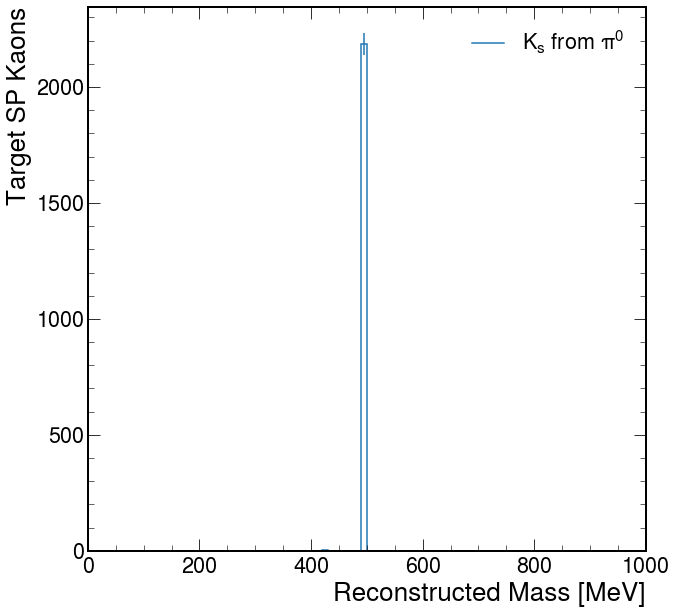

In [8]:
print(hists["rec_mass_hist"])
fig, ax = plt.subplots()
hist.plot1d(hists["rec_mass_hist"],ax=ax,clear=False);
leg = ax.legend([r'$K_s$ from $\pi^0$'])